In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
# import pickle


In [3]:
train = pd.read_pickle('Processed_train_data.pkl')
history_data = pd.read_pickle('Processed_history_data.pkl')

# Feature engineering
Since we have the consumption data for each of the companies for the year 2015, we will create new features using the **average of the year, the last six months, and the last three months** to our model.

In [4]:
history_data[history_data['id'] == "0002203ffbb812588b632b9e628cc38d"]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
72163,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
72164,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
72165,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
72166,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
72167,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
72168,0002203ffbb812588b632b9e628cc38d,2015-06-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
72169,0002203ffbb812588b632b9e628cc38d,2015-07-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
72170,0002203ffbb812588b632b9e628cc38d,2015-08-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
72171,0002203ffbb812588b632b9e628cc38d,2015-09-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
72172,0002203ffbb812588b632b9e628cc38d,2015-10-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555


In [5]:
mean_year = history_data.groupby(['id']).mean().reset_index() # calculate the average price of each period

In [6]:
mean_6m = history_data[history_data['price_date']>"2015-06-01"].groupby(['id']).mean().reset_index()

In [7]:
mean_3m = history_data[history_data['price_date']>"2015-09-01"].groupby(['id']).mean().reset_index()

In [8]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
                                                "price_p2_var": "mean_year_price_p2_var",
                                                "price_p3_var": "mean_year_price_p3_var",
                                                "price_p1_fix": "mean_year_price_p1_fix",
                                                "price_p2_fix": "mean_year_price_p2_fix",
                                                "price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [9]:
mean_6m = mean_6m.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var",
                                            "price_p2_var": "mean_6m_price_p2_var",
                                            "price_p3_var": "mean_6m_price_p3_var",
                                            "price_p1_fix": "mean_6m_price_p1_fix",
                                            "price_p2_fix": "mean_6m_price_p2_fix",
                                            "price_p3_fix": "mean_6m_price_p3_fix",})
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

In [10]:
mean_3m = mean_3m.rename(index=str, columns={"price_p1_var": "mean_3m_price_p1_var",
                                            "price_p2_var": "mean_3m_price_p2_var",
                                            "price_p3_var": "mean_3m_price_p3_var",
                                            "price_p1_fix": "mean_3m_price_p1_fix",
                                            "price_p2_fix": "mean_3m_price_p2_fix",
                                            "price_p3_fix": "mean_3m_price_p3_fix",})
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

KEY: By now, doing these feature engineer cannot assure there will be a valid effect. So Idea is to find as many potential attribute to be better.


In [13]:
# feature = mean_year.merge(mean_6m, on = 'id')
# feature = feature.merge(mean_3m, on = 'id')
feature = mean_year

## Such average is shallow, how to find valuable insight (KEY, domain in each industries is important)
**Find tenure = date_end - date_start**

In [152]:
(pd.to_datetime(train['date_end']) - pd.to_datetime(train['date_activ']))

0       1460 days
1       1096 days
2       2566 days
3       2192 days
4       2192 days
           ...   
16091   1445 days
16092   1461 days
16093   1460 days
16094   1461 days
16095   2556 days
Length: 16096, dtype: timedelta64[ns]

In [153]:
train['tenure'] = ((train['date_end'] - train['date_activ'])/np.timedelta64(1, 'Y')).astype(int)

In [154]:
tenure = train[['tenure', 'churn','id']].groupby(['tenure','churn'])['id'].count().unstack(level = 1)

In [155]:
tenure_percetage = (tenure.div(tenure.sum(axis =1), axis = 0) * 100)

In [156]:
tenure_percetage

churn,0,1
tenure,,
0,100.000000,NaN
2,86.754967,13.245033
3,85.922684,14.077316
4,87.161027,12.838973
5,91.019050,8.980950
6,91.900030,8.099970
7,92.654774,7.345226
8,93.641618,6.358382
9,97.916667,2.083333


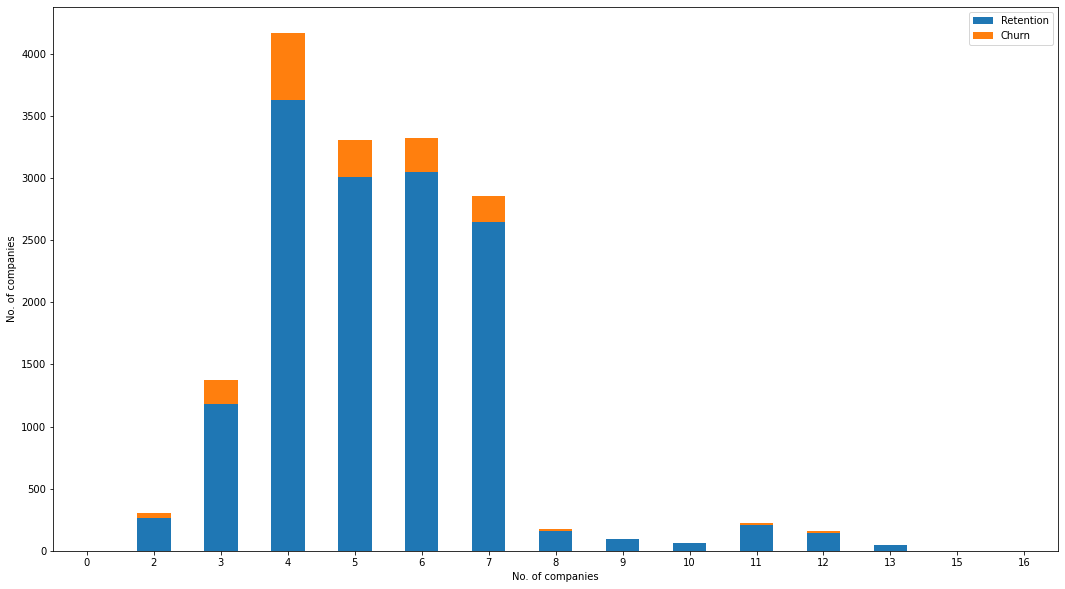

In [157]:
tenure.plot(kind='bar',
            figsize=(18,10),
            stacked = True,
            rot = 0)
# legend
plt.legend(['Retention','Churn'],loc = 'upper right')
# label
plt.ylabel('No. of companies')
plt.xlabel('No. of companies')
plt.show()

## Transforming Datetime variable
We can cleary see that churn is **very low for companies which joied recently or that have made the contract a long time ago**. With the high numerber of churn within 3-7 years of tenures

We will also transform the dates provided in such a way that we can make more sense out of those.:

    months_activ : Number of months active until reference date (Jan 2016)
    months_to_end : Number of months of the contract left at reference date (Jan 2016)
    months_modif_prod : Number of months since last modification at reference date (Jan 2016)
    months_renewal : Number of months since last renewal at reference date (Jan 2016)
    
To create the month column we will follow a simple process:  

    1. Substract the reference date and the column date
    2. Convert the timedelta in months
    3. Convert to integer (we are not interested in having decimal months)

In [158]:
REFERENCE_DATE = datetime.datetime(2016,1,1)

In [159]:
def convert_months(ref_date, df, col):
    time_delta = ref_date - df[col]
    months = (time_delta / np.timedelta64(1,'M')).astype(int)
    return months

In [160]:
train['month_activ'] = convert_months(REFERENCE_DATE, train, 'date_activ')
train['month_to_end'] = -convert_months(REFERENCE_DATE, train, 'date_end')
train['month_modif_prod'] = convert_months(REFERENCE_DATE, train, 'date_modif_prod')
train['month_renewal'] = convert_months(REFERENCE_DATE, train, 'date_renewal')

In [161]:
# train[['date_activ', 'month_activ']]
train[['date_end','month_to_end']].sort_values(by = 'date_end')

,date_end,month_to_end
5910,2006-08-26,-112
15373,2013-05-06,-31
14490,2016-01-28,0
6936,2016-01-28,0
1553,2016-01-28,0
...,...,...
9221,2017-01-28,12
2130,2017-01-29,12
8688,2017-06-01,16
15742,2017-06-11,17


In [162]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
    """
    Plot churn distribution by monthly variable
    """
    temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
    temp.plot(kind="bar",
            figsize=(18,10),
            stacked=True,
            rot=0,
            title= column)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    # Labels
    plt.ylabel("No. of companies")
    plt.xlabel("No. of months")
    # Set xlabel fontsize
    plt.xticks(fontsize=fontsize_)
    plt.show()

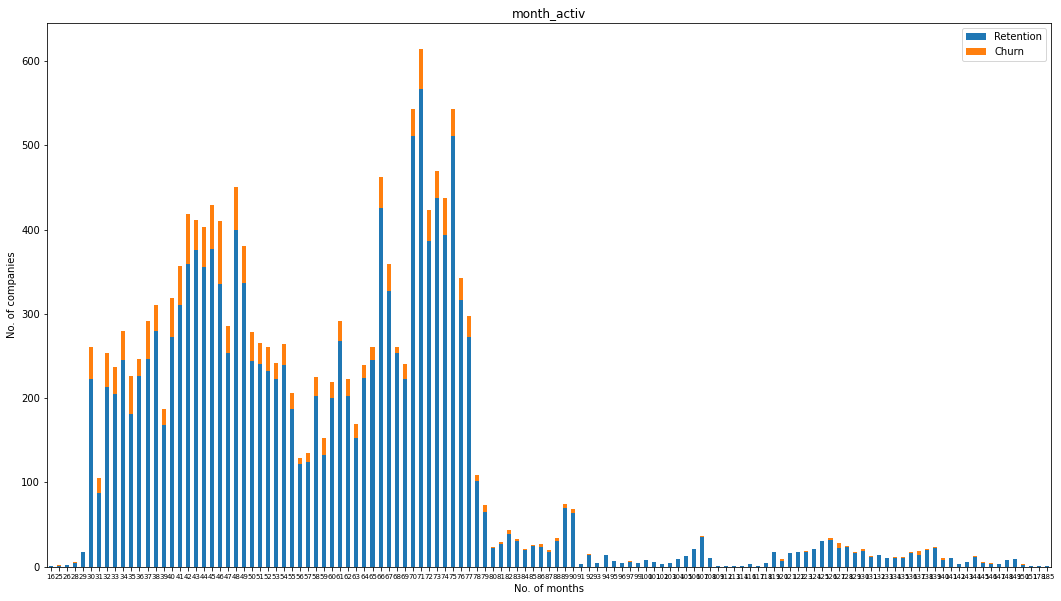

In [163]:
plot_churn_by_month(train, "month_activ", 7)

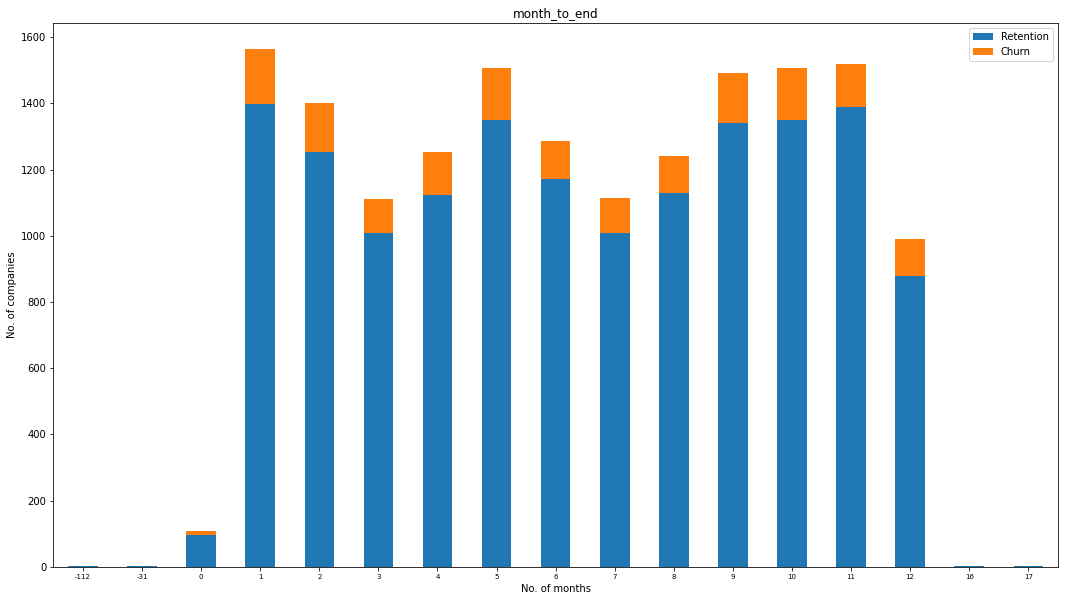

In [164]:
plot_churn_by_month(train, "month_to_end", 7)

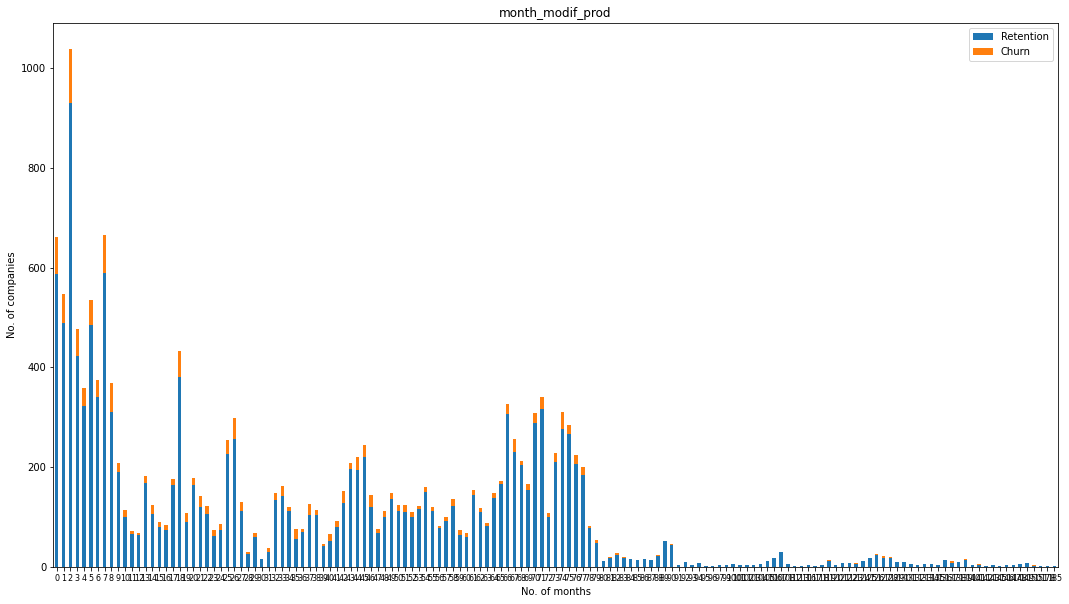

In [165]:
plot_churn_by_month(train, "month_modif_prod", 8)

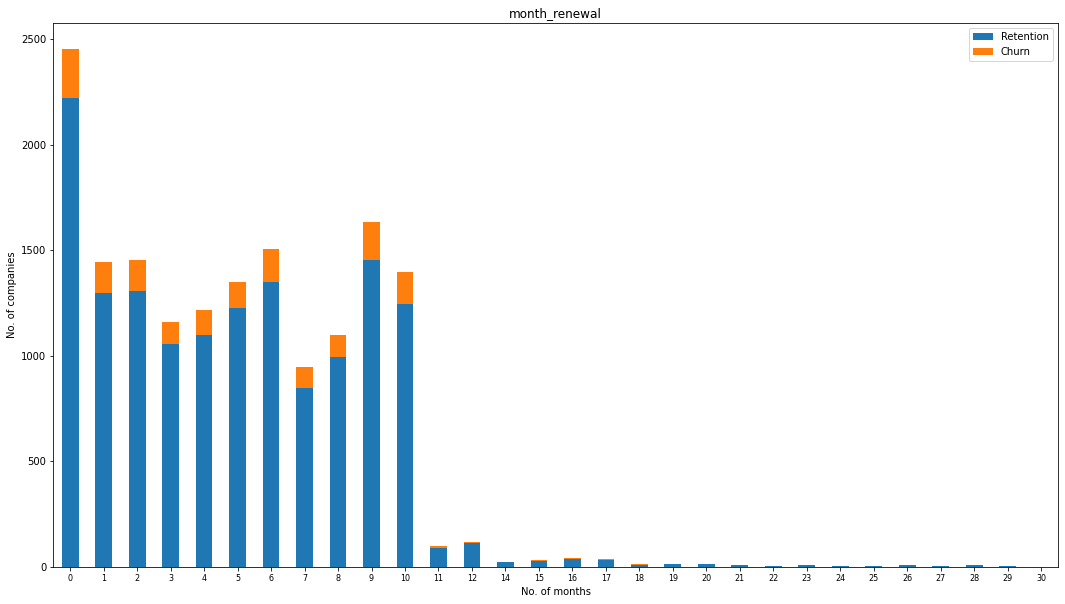

In [166]:
plot_churn_by_month(train, "month_renewal", 8)

## Transforming boolean data
Perform **label encoding** for Bool data

In [167]:
train['has_gas'] = train['has_gas'].replace(['t','f'],[1,0])

In [168]:
train['has_gas']

0        0
1        1
2        0
3        0
4        0
        ..
16091    1
16092    0
16093    0
16094    0
16095    0
Name: has_gas, Length: 16096, dtype: int64

## Transform categorical data and dumm variable
When training our model we cannot use string data as such, so we will need to encode it into numerical data. The easiest method is mapping each category to an integer (**label encoding**) but this will **not work because the model will misunderstand the data to be in some kind of order or hierarchy, 0 < 1 < 2 < 3 ...**  

For that reason we will use a method with dummy variables or onehot encoder

### Categorical data channel_sales:   

What we are doing here relatively simple, we want to convert each category into a new dummy variable which will have 0 s and 1 s depending whether than entry belongs to that particular category or not  

First of all let's replace the Nan values with a string called null_values_channel

In [172]:
train['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7377
null_value                          4218
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [173]:
# Transform to categorical data type
train["channel_sales"] = train["channel_sales"].astype("category") # KEY, can direct transform to category data type

In [174]:
pd.DataFrame({'Sample in category':train['channel_sales'].value_counts() })

,Sample in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_value,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


**So that means we will create 8 different dummy variables . Each variable will become a different column.**

In [175]:
# Create dummy variables
categories_channel = pd.get_dummies(train["channel_sales"], prefix = "channel")

In [177]:
# Rename for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]

In [179]:
categories_channel.head()

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


multicollinearity is when two or more independent variables in a regression are highly related to one another, such that they do not provide unique or independent information to the regression.  

Multicollinearity can affect our models so we will remove one of the columns.  
**How to know which to discard?**

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

X = categories_channel
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature       VIF
0  channel_epu  1.000000
1  channel_ewp  0.204969
2  channel_fix  1.000000
3  channel_foo  0.028331
4  channel_lmk  0.012060
5  channel_nul  0.028924
6  channel_sdd  1.000000
7  channel_usi  0.113573


### Categorical data origin_up
First of all let's replace the Nan values with a string called null_values_origin

In [186]:
train['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7825
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3664
null_value                            87
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [187]:
pd.DataFrame({"Samples in category": train["origin_up"].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_value,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [188]:
# Create dummy variables
categories_origin = pd.get_dummies(train["origin_up"], prefix = "origin")
# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

In [189]:
categories_origin.head(5)

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


Finally remove one column to avoid the **dummy variable trap**
[dummy variable trap explanation](https://www.slideshare.net/Akramism/dummy-variable-28538000)

In [190]:
categories_origin.drop(columns=["origin_nul"],inplace=True)

### Categorical data - Featre engineering

In [194]:
categories_activity = pd.DataFrame({"Activity samples":train["activity_new"].value_counts()})
categories_activity

,Activity samples
null_value,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
xbwipkcuemuidpumuiomukkicculdmsb,1
xumuokeiidieboawuxkidxufcexecbbl,1
cswwlpkkduufdbfwfpflussouxbmbxbe,1
iilxdefdkwudppkiekwlcexkdupeucla,1


As we can see below there are too many categories with very few number of samples.  
So we will replace any **category with less than 75 samples as null_values_category**

In [195]:
# Get the categories with less than 75 samples
to_replace = list(categories_activity[categories_activity["Activity samples"] <= 75].index)
# Replace them with `null_values_categories`
train["activity_new"]=train["activity_new"].replace(to_replace,"null_values_activity")

In [196]:
# Create dummy variables
categories_activity = pd.get_dummies(train["activity_new"], prefix = "activity")
# Rename columns for simplicity
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]

In [197]:
categories_activity.drop(columns=["activity_nul"],inplace=True)

**Merge dummy variables to main dataframe**  
We will merge all the new categories into our main dataframe and remove the old categorical columns

In [198]:
# Use common index to merge
train = pd.merge(train, categories_channel, left_index=True, right_index=True)
train = pd.merge(train, categories_origin, left_index=True, right_index=True)
train = pd.merge(train, categories_activity, left_index=True, right_index=True)

In [199]:
train.drop(columns=["channel_sales", "origin_up", "activity_new"],inplace=True)

# Log transformation (KEY)  
Remember from the previous exercise that a lot of the variables we are dealing with are highly skewed to the right.  
  
**Why is skewness relevant?** Skewness is not "bad" per se.   

Nonetheless, some predective models make fundamental assumptions related to variables being **"normally distributed"**. Hence, the model will perform poorly if the data is highly skewed.

There are several methods in which we can reduce skewness such as **square root , cube root , and log**.  
In this case, we will use a log transformation which is **usually recommended for right skewed data.**

In [200]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.983785,70.309945,0.135955,0.053211,43.539585,...,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.141470,79.023251,0.026157,0.048515,5.192262,...,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Particularly relevant to look at the **standard deviation std which is very very high for some variables.**  

Log transformation does not work with negative data, so we will convert the negative values to **NaN.**

In [201]:
# Remove negative values
train.loc[train.cons_12m < 0,"cons_12m"] = np.nan
train.loc[train.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
train.loc[train.cons_last_month < 0,"cons_last_month"] = np.nan
train.loc[train.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
train.loc[train.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
train.loc[train.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
train.loc[train.imp_cons < 0,"imp_cons"] = np.nan

In [202]:
# Apply log10 transformation
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1)
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1)
train["imp_cons"] = np.log10(train["imp_cons"]+1)

/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

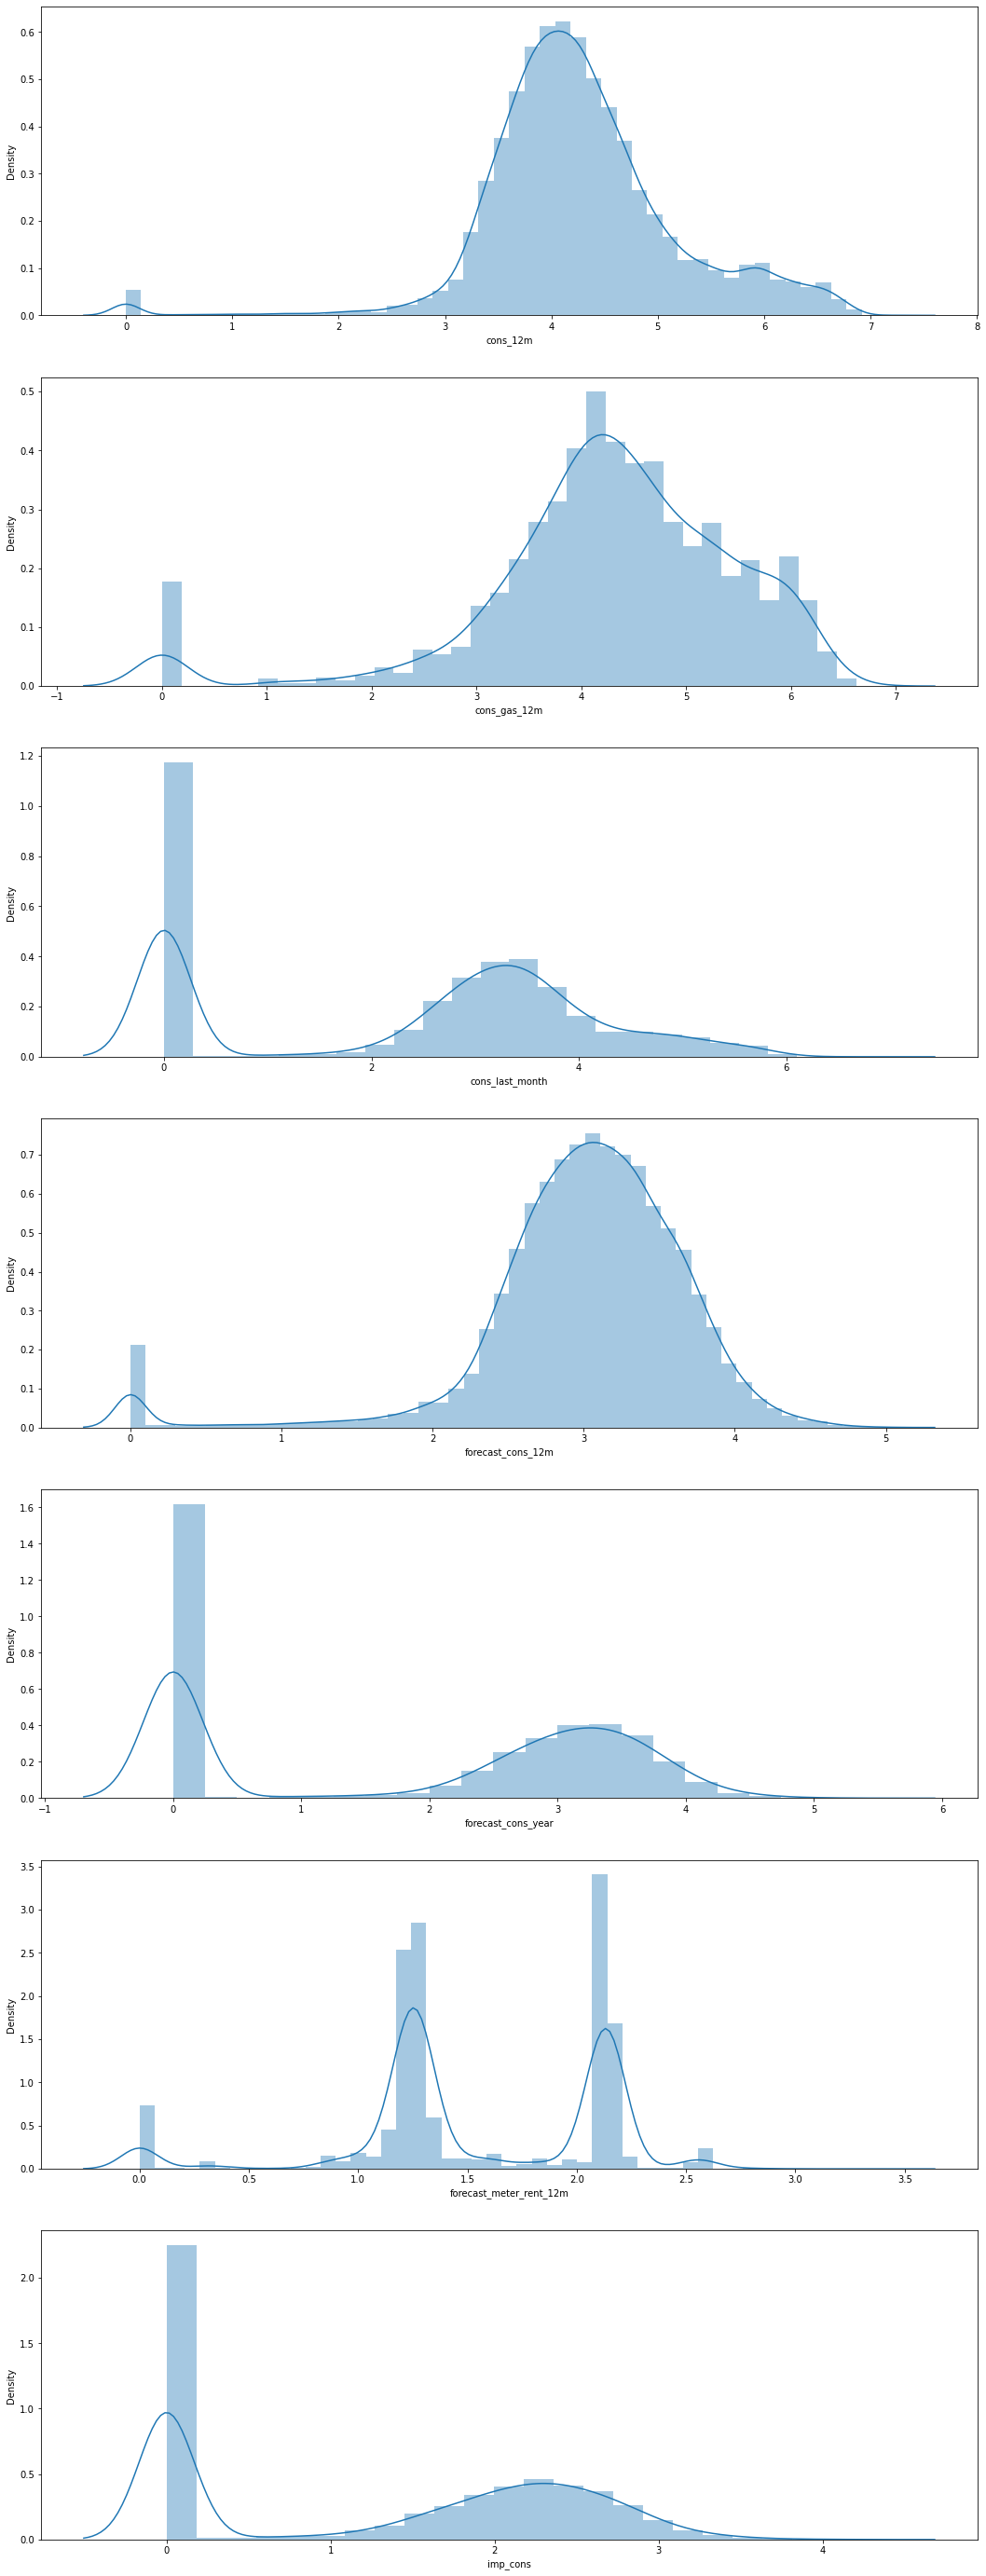

In [204]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((train["cons_12m"].dropna()), ax=axs[0])
sns.distplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/b

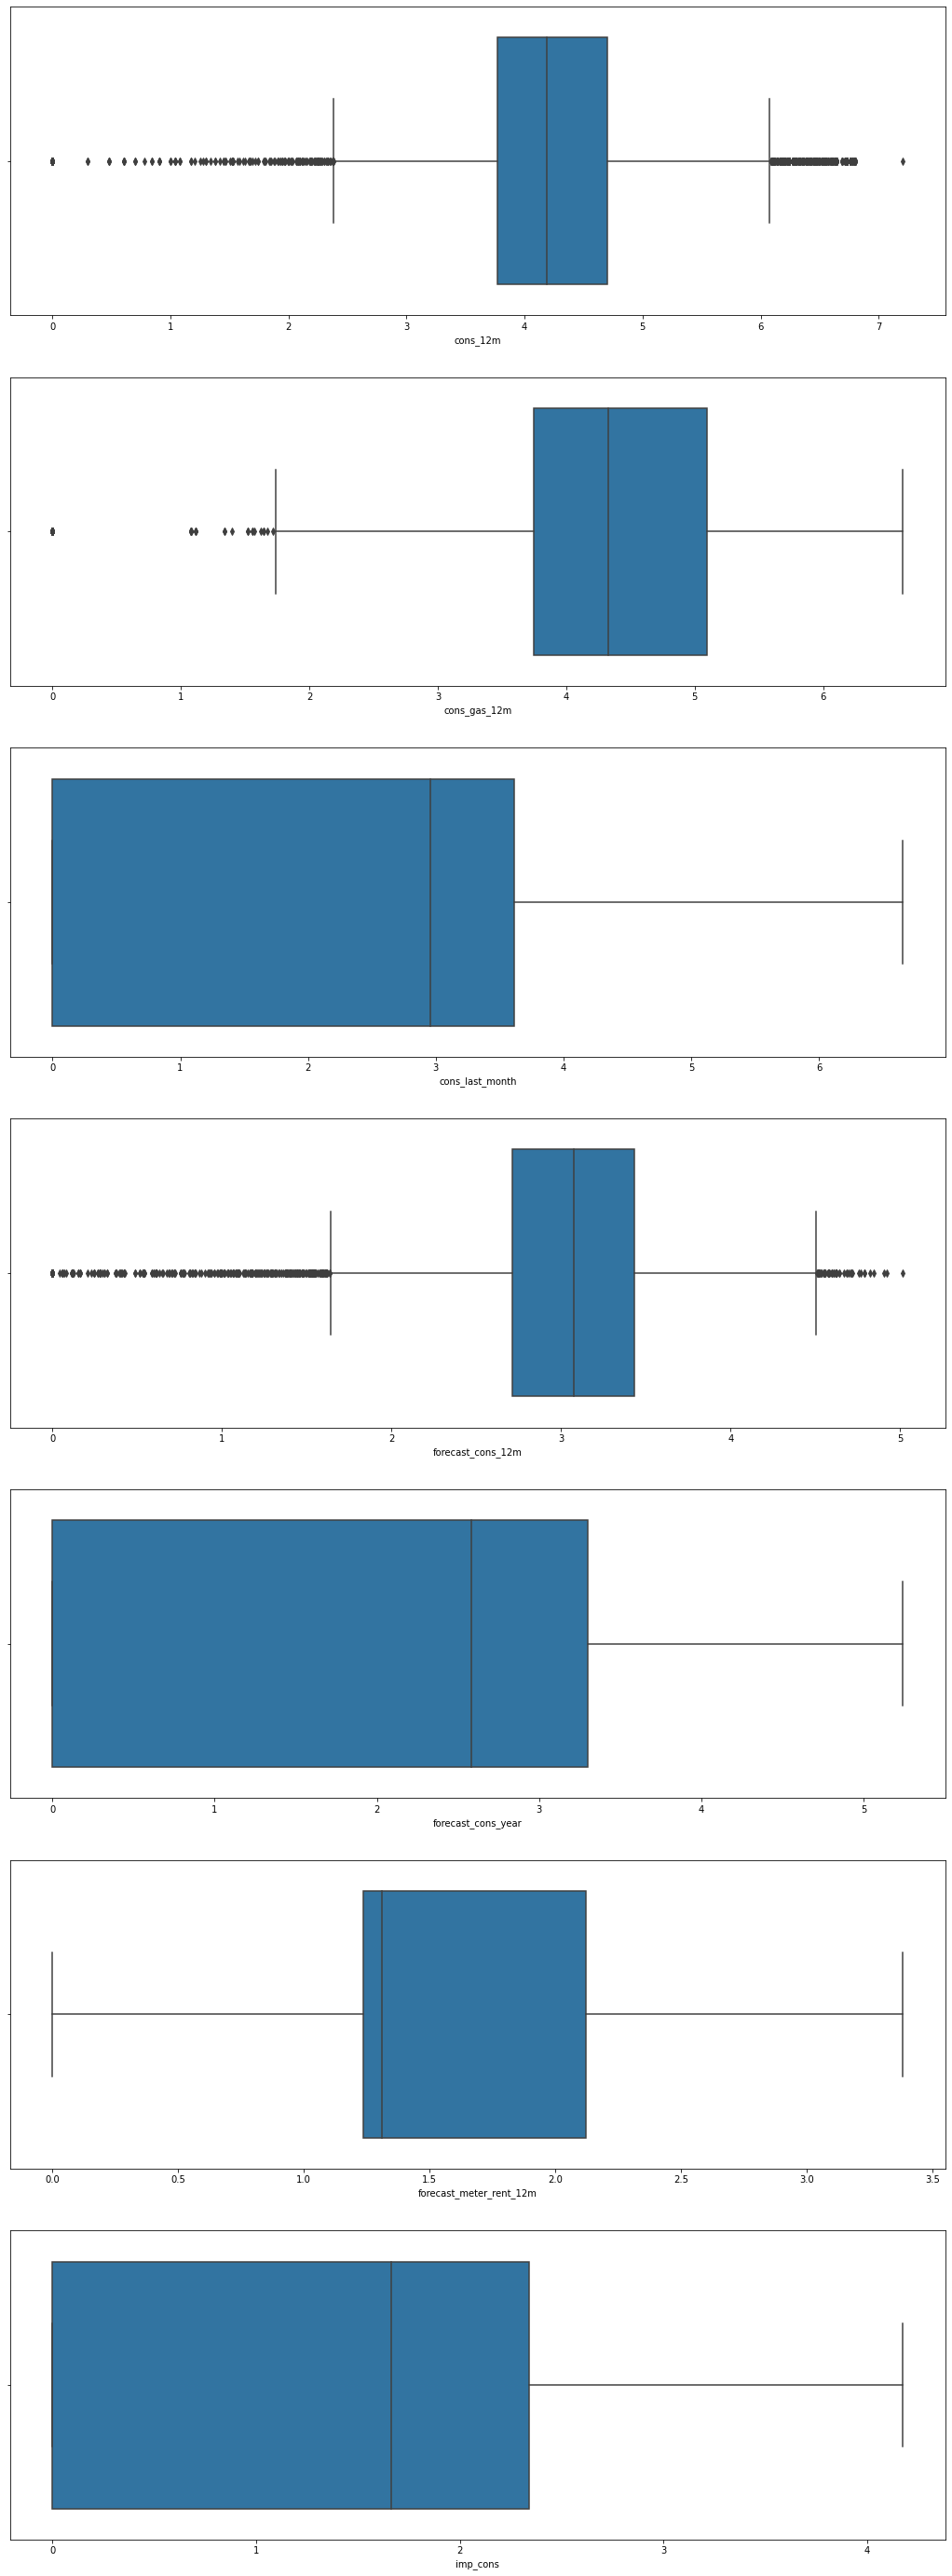

In [205]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [203]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,16096.000000,16092.000000,16096.000000,16096.000000,16096.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.983785,1.549610,0.135955,0.053211,43.539585,...,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.141470,0.589394,0.026157,0.048515,5.192262,...,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The distributions look much closer to normal distributions now!  
Notice how the **standard deviation std has changed.**

From the boxplots we can still see some values are quite far from the range **( outliers ). We will deal with them later.**

# High correlation variables(history data set)

In [210]:
feature = mean_year

In [211]:
# Calculate correlation of variables
correlation = feature.corr()

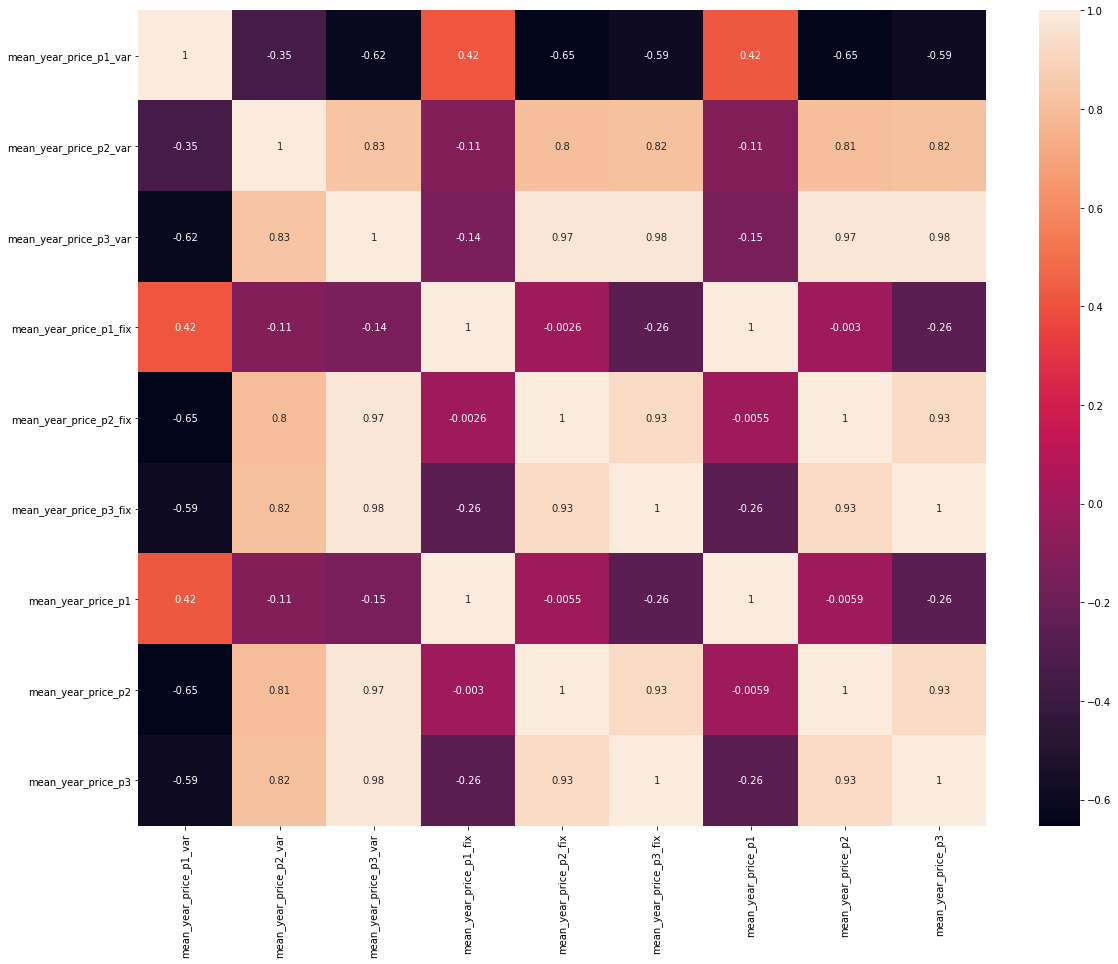

In [212]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

We can remove **highly correlated variables.**
  
**Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy.**  
  
----
This can lead to skewed or misleading results. Luckily, **decision trees and boosted trees algorithms are immune to multicollinearity by nature.**  

When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like **Logistic Regression or Linear Regression** are not immune to that problem and should be fixed before training the model.

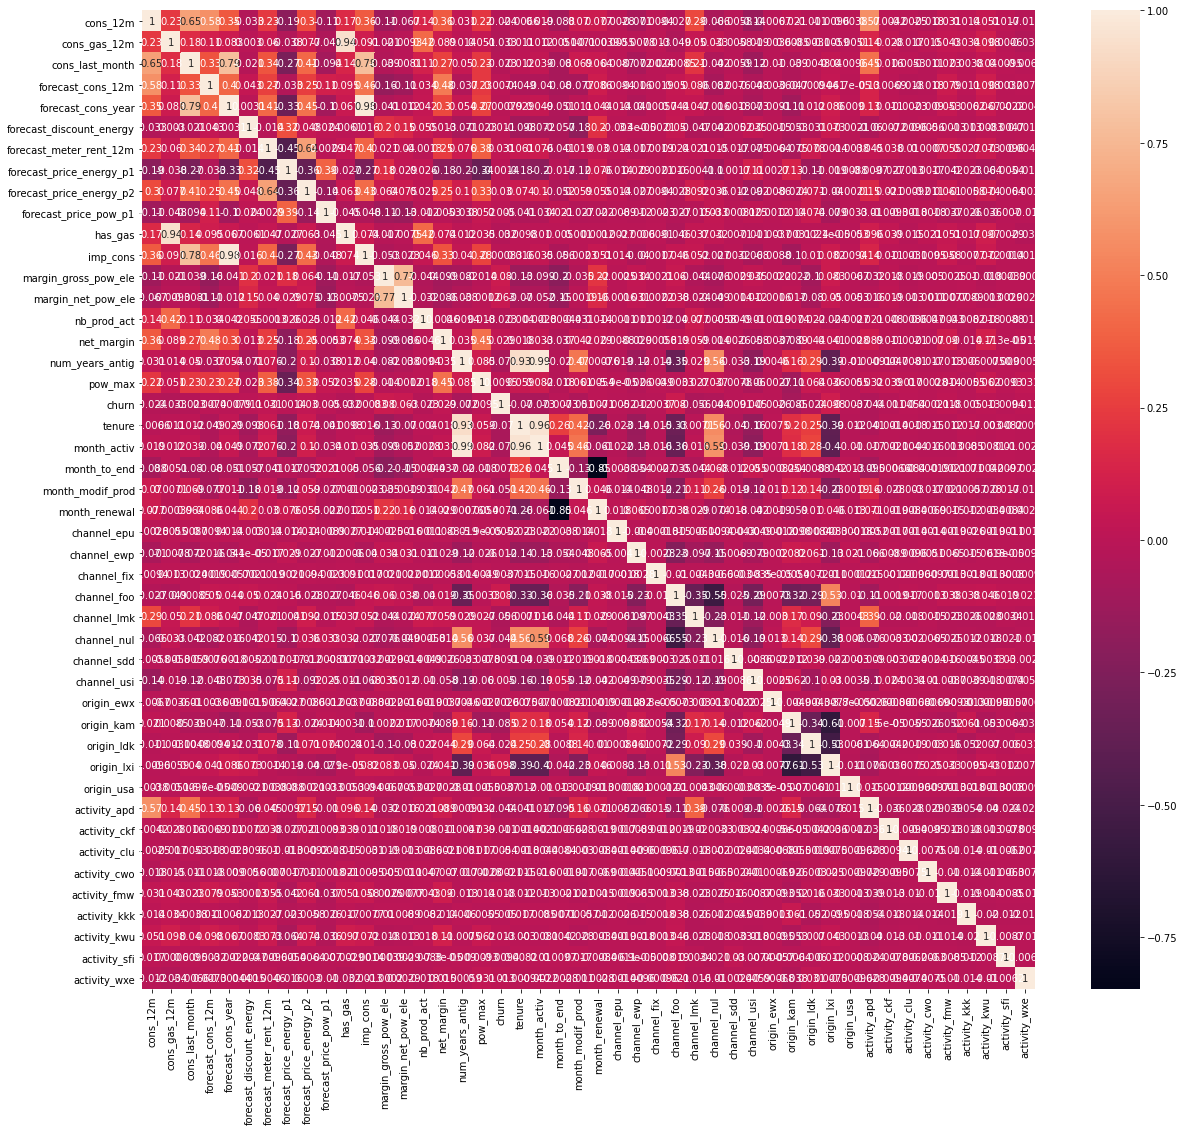

In [214]:
correlation = train.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

As expected, num_years_antig has a high correlation with months_activ (it provides us the same information).
We can remove variables with very high correlation

In [ ]:
train.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

#  Removing Outliers
As we identified during the exploratory phase, the consumption data has several outliers. We are going to remove those outliers  
**What are the criteria to identify an outlier?**
The most common way to identify an outlier are:

    1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
    2. Data point that falls outside of 3 standard deviations.

Once, we have identified the outlier, **What do we do with the outliers?**
There are several ways to handle with those outliers such as **removing them (this works well for massive datasets)** or **replacing them with sensible data (works better when the dataset is not that big)**.  

We will replace the outliers with the mean (average of the values excluding outliers).

In [216]:
def replace_outliers_z_score(dataframe, column, Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column
    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [220]:
for c in feature.columns:
    if c != "id":
        feature = replace_outliers_z_score(feature,c)

Replaced: 277  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 0  outliers in  mean_year_price_p3_var
Replaced: 121  outliers in  mean_year_price_p1_fix
Replaced: 0  outliers in  mean_year_price_p2_fix
Replaced: 0  outliers in  mean_year_price_p3_fix
Replaced: 122  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [221]:
feature

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


In [222]:
def _find_outliers_iqr(dataframe, column):
    """
    Find outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column
    Returns
    -------
    Dict
    With the values of the iqr, lower_bound and upper_bound
    """
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    return results

def remove_outliers_iqr(dataframe, column):
    """
    Remove outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column
    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    outliers = _find_outliers_iqr(dataframe, column)
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
    (dataframe[column] > outliers["upper_bound"])].shape
    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
    (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe

def remove_outliers_z_score(dataframe, column, Z=3):
    """
    Remove outliers using the Z score. Values with more than 3 are removed.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column
    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore
    dataframe["zscore"] = zscore(dataframe[column])
    removed = dataframe[(dataframe["zscore"] < -Z) |
    (dataframe["zscore"] > Z)].shape
    dataframe = dataframe[(dataframe["zscore"] > -Z) &
    (dataframe["zscore"] < Z)]
    print("Removed:", removed[0], " outliers of ", column)
    return dataframe.drop(columns="zscore")

def replace_outliers_z_score(dataframe, column, Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column
    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
    # Replace with mean values
    no_outliers = dataframe[column].isnull().sum()
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [226]:
train = replace_outliers_z_score(train,"cons_12m")
train = replace_outliers_z_score(train,"cons_gas_12m")
train = replace_outliers_z_score(train,"cons_last_month")
train = replace_outliers_z_score(train,"forecast_cons_12m")
#train = replace_outliers_z_score(train,"forecast_cons_year")
train = replace_outliers_z_score(train,"forecast_discount_energy")
train = replace_outliers_z_score(train,"forecast_meter_rent_12m")
train = replace_outliers_z_score(train,"forecast_price_energy_p1")
train = replace_outliers_z_score(train,"forecast_price_energy_p2")
train = replace_outliers_z_score(train,"forecast_price_pow_p1")
train = replace_outliers_z_score(train,"imp_cons")
train = replace_outliers_z_score(train,"margin_gross_pow_ele")
train = replace_outliers_z_score(train,"margin_net_pow_ele")
train = replace_outliers_z_score(train,"net_margin")
train = replace_outliers_z_score(train,"pow_max")
train = replace_outliers_z_score(train,"month_activ")
train = replace_outliers_z_score(train,"month_to_end")
train = replace_outliers_z_score(train,"month_modif_prod")
train = replace_outliers_z_score(train,"month_renewal")

Replaced: 0  outliers in  cons_12m
Replaced: 0  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 0  outliers in  forecast_cons_12m
Replaced: 0  outliers in  forecast_discount_energy
Replaced: 0  outliers in  forecast_meter_rent_12m
Replaced: 0  outliers in  forecast_price_energy_p1
Replaced: 0  outliers in  forecast_price_energy_p2
Replaced: 0  outliers in  forecast_price_pow_p1
Replaced: 0  outliers in  imp_cons
Replaced: 0  outliers in  margin_gross_pow_ele
Replaced: 0  outliers in  margin_net_pow_ele
Replaced: 0  outliers in  net_margin
Replaced: 0  outliers in  pow_max
Replaced: 0  outliers in  month_activ
Replaced: 0  outliers in  month_to_end
Replaced: 0  outliers in  month_modif_prod
Replaced: 0  outliers in  month_renewal


In [227]:
train.reset_index(drop=True, inplace=True)

Let's see how the boxplots changed!  

Note: I do like applying a light Z-score of 3, although IQR is usually heavier on the data.

/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/b

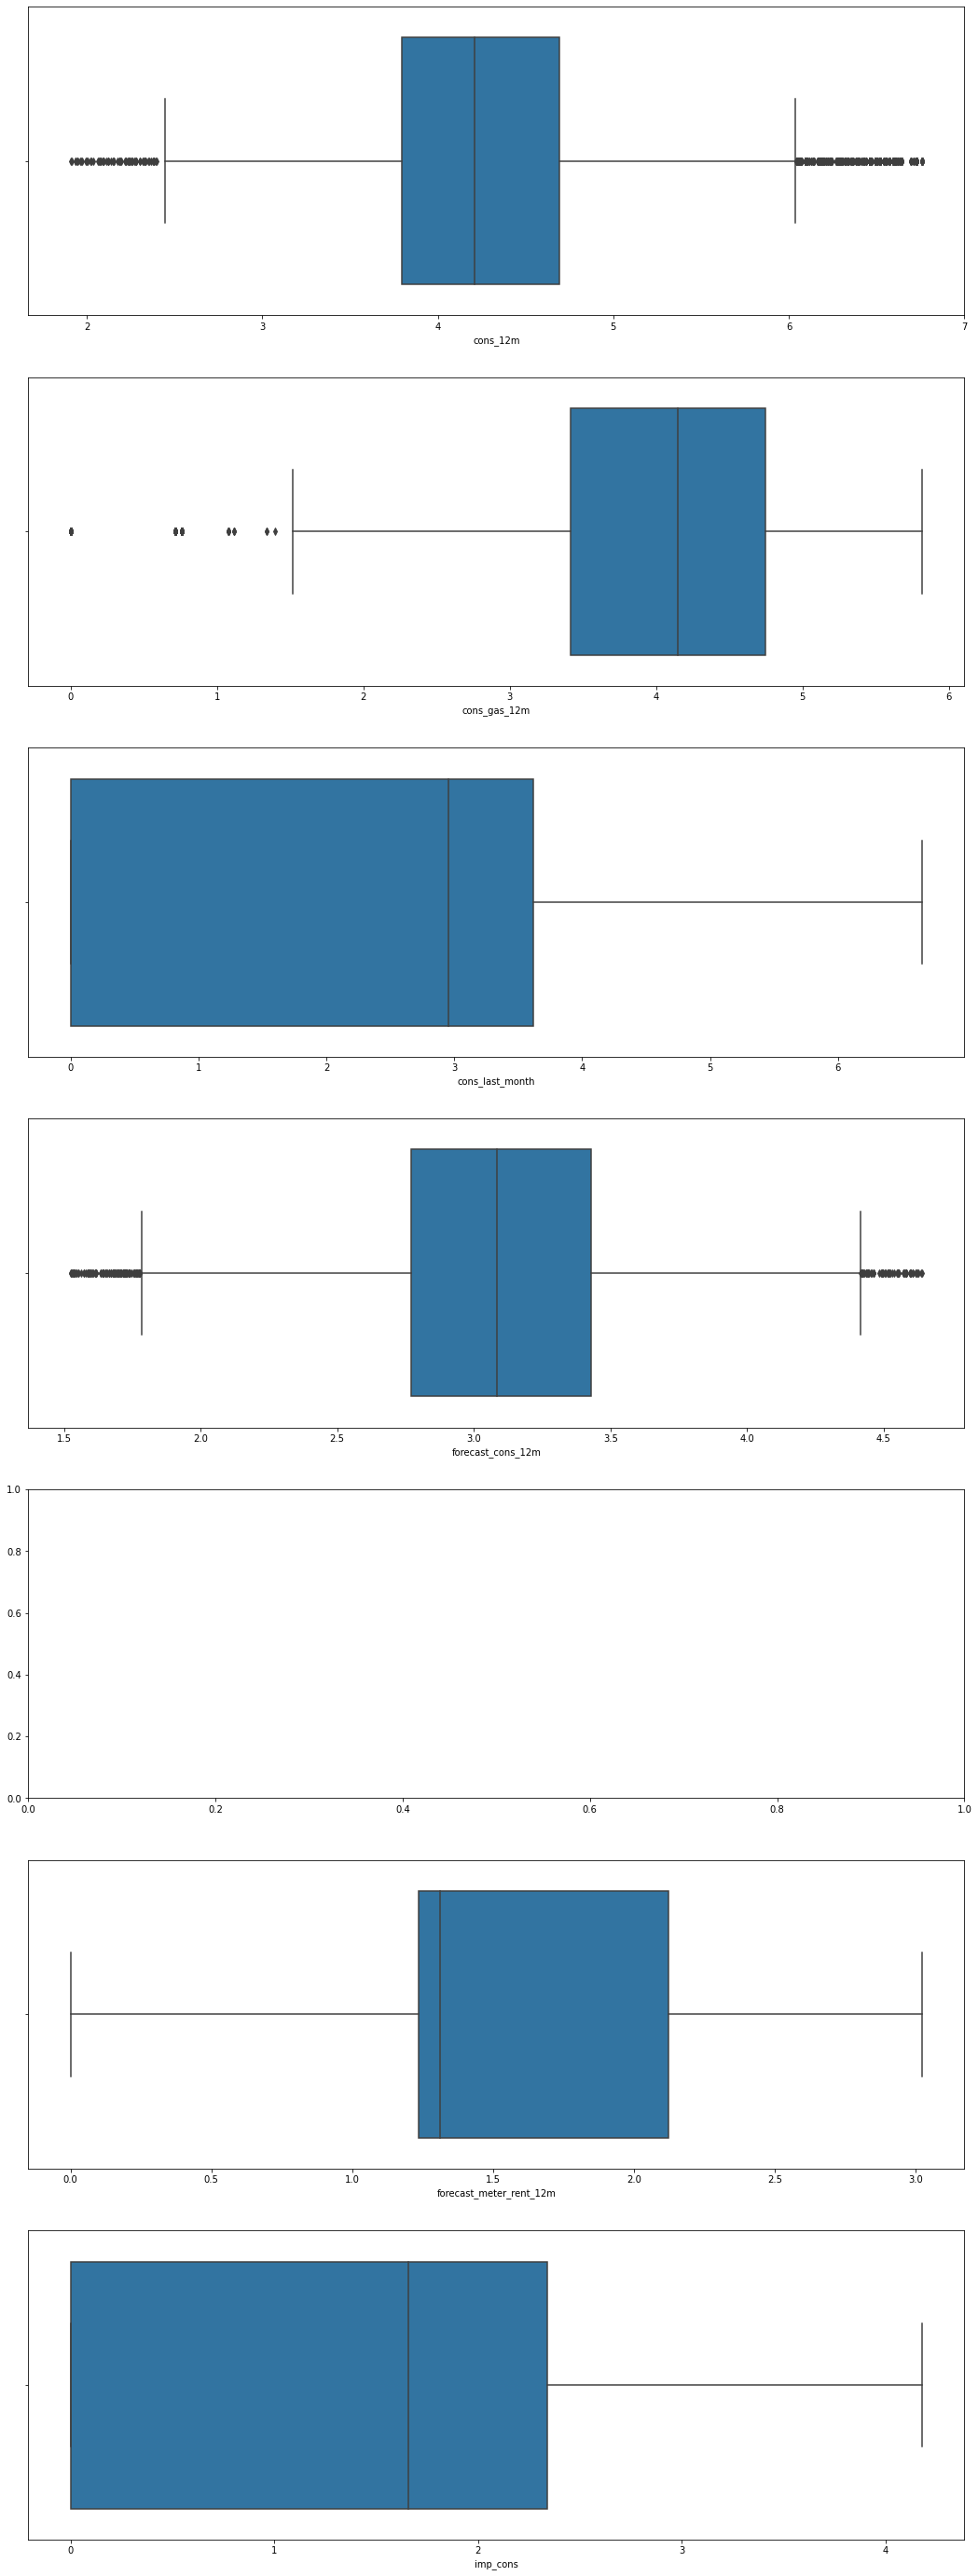

In [228]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

# Pickling
We will pickle the data so that we can easily retrieve it in for the next exercise.

In [14]:
pd.to_pickle(train, 'feature_engineered_train_data.pkl')
pd.to_pickle(feature, 'feature_engineered_history_data.pkl')